<a href="https://colab.research.google.com/github/vtu23260-cmd/data-visualization/blob/main/DV_Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task--8


Error loading world shapefile: '/vsizip/ne_110m_admin_0_countries.zip/ne_110m_admin_0_countries.shp' does not exist in the file system, and is not recognized as a supported dataset name.
Basic Information:
Total cities/towns: 1096
Districts covered: 32


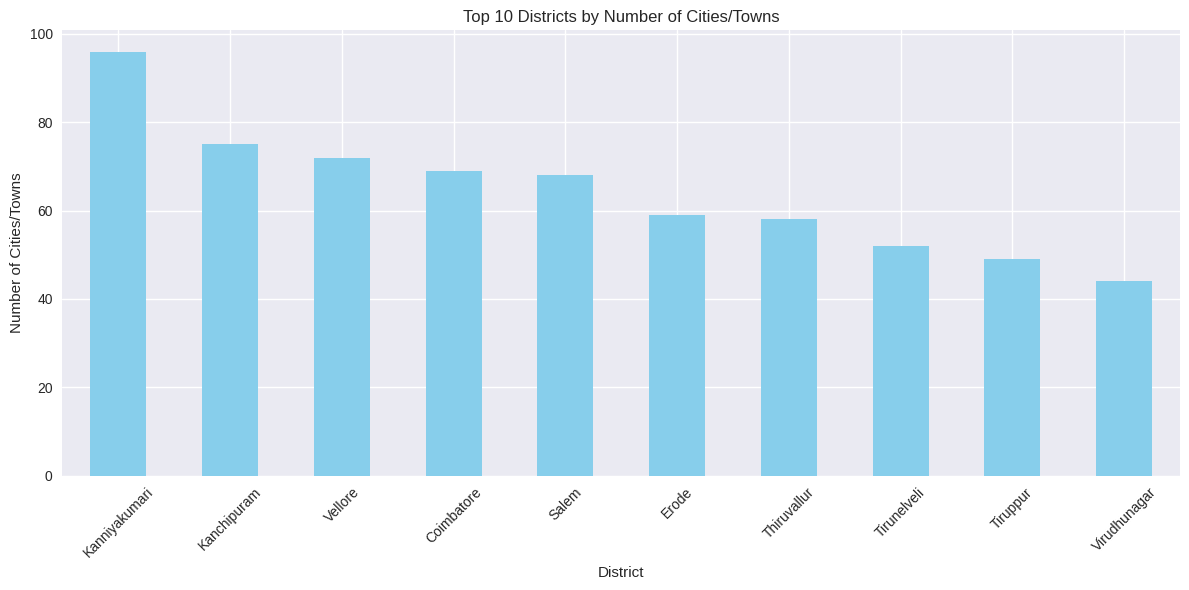


GEOSPATIAL ANALYSIS

1. SPATIAL DISTRIBUTION ANALYSIS:
Northernmost city: Chennai [Madras] (Lat: 13.2572)
Southernmost city: Pallanthurai (Lat: 7.8929)
Easternmost city: Chennai [Madras] (Lon: 80.3491)
Westernmost city: Gudalur (Lon: 76.5404)
Spatial Extent: 5.36° latitude × 3.81° longitude

2. REGIONAL DISTRIBUTION:
  Northern Tamil Nadu: 507 cities/towns
  Central Tamil Nadu: 372 cities/towns
  Southern Tamil Nadu: 217 cities/towns

3. URBAN HIERARCHY:
  Small Town: 736 settlements (avg pop: 11,143)
  Medium Town: 248 settlements (avg pop: 29,555)
  Large Town: 80 settlements (avg pop: 69,139)
  City: 29 settlements (avg pop: 245,739)
  Metropolitan: 3 settlements (avg pop: 2,238,439)

4. DISTRICT-WISE SPATIAL ANALYSIS:
Top 5 districts by number of cities:
               City_Count  Total_Population
District                                   
Kanniyakumari          96         1539802.0
Kanchipuram            75         2538336.0
Vellore                72         1701987.0
Coimbatore

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon
import requests
import os

# Define the URL for the naturalearth_lowres dataset
world_data_url = "https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m_cultural/ne_110m_admin_0_countries.zip"
world_data_path = "ne_110m_admin_0_countries.zip"
world_shapefile_path = "ne_110m_admin_0_countries.shp"

# Download the data if it doesn't exist
if not os.path.exists(world_data_path):
    print(f"Downloading {world_data_url}...")
    response = requests.get(world_data_url)
    with open(world_data_path, 'wb') as f:
        f.write(response.content)
    print("Download complete.")

# Load the world dataset
try:
    world = gpd.read_file(f"zip://{world_data_path}!{world_shapefile_path}")
except Exception as e:
    print(f"Error loading world shapefile: {e}")
    world = None

# Load the dataset
df = pd.read_csv("Cities and Towns in Tamil Nadu - Population statistics.csv")

# Data cleaning function
def clean_population(value):
    if pd.isna(value) or value == '...':
        return None
    if isinstance(value, str):
        return float(value.replace(',', ''))
    return value

# Clean population data
df['Population_2011'] = df['Population\nCensus\n2011-03-01'].apply(clean_population)
df['Population_2001'] = df['Population\nCensus\n2001-03-01'].apply(clean_population)

# Calculate growth rate
df['Growth_Rate'] = ((df['Population_2011'] - df['Population_2001']) / df['Population_2001']) * 100

# Create approximate coordinates for Tamil Nadu districts
district_coords = {
    'Chennai': (13.0827, 80.2707),
    'Coimbatore': (11.0168, 76.9558),
    'Madurai': (9.9252, 78.1198),
    'Salem': (11.6643, 78.1460),
    'Tiruchirappalli': (10.7905, 78.7047),
    'Tirunelveli': (8.7139, 77.7567),
    'Vellore': (12.9165, 79.1325),
    'Erode': (11.3410, 77.7172),
    'Thoothukkudi': (8.7642, 78.1348),
    'Tiruppur': (11.1085, 77.3411),
    'Kanchipuram': (12.8333, 79.7000),
    'Kanniyakumari': (8.0883, 77.5385),
    'Virudhunagar': (9.5690, 77.9624),
    'Krishnagiri': (12.5186, 78.2137),
    'Karur': (10.9600, 78.0760),
    'Namakkal': (11.2200, 78.1700),
    'Theni': (10.0100, 77.4800),
    'Cuddalore': (11.7500, 79.7500),
    'Nagapattinam': (10.7667, 79.8417),
    'Tiruvannamalai': (12.2253, 79.0745),
    'Viluppuram': (11.9426, 79.4973),
    'Ariyalur': (11.1378, 79.0758),
    'Pudukkottai': (10.3800, 78.8200),
    'Sivaganga': (9.8477, 78.4833),
    'Dharmapuri': (12.1277, 78.1579),
    'Ramanathapuram': (9.3800, 78.8300),
    'Thiruvarur': (10.7725, 79.6368),
    'Perambalur': (11.2333, 78.8833),
    'The Nilgiris': (11.4000, 76.7000)
}

# Add coordinates to dataframe with some randomness for better visualization
np.random.seed(42)
def get_coordinates(district):
    base_lat, base_lon = district_coords.get(district, (10.5, 78.5))
    # Add small random offset for better visualization
    lat = base_lat + np.random.uniform(-0.2, 0.2)
    lon = base_lon + np.random.uniform(-0.2, 0.2)
    return lat, lon

coords = df['District'].apply(get_coordinates)
df['Latitude'] = coords.apply(lambda x: x[0])
df['Longitude'] = coords.apply(lambda x: x[1])

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude'])
)
gdf = gdf.set_crs(epsg=4326)  # WGS84 coordinate system

print("Basic Information:")
print(f"Total cities/towns: {len(gdf)}")
print(f"Districts covered: {gdf['District'].nunique()}")

# 1. BASIC GEOGRAPHICAL MAP
if world is not None:
    plt.figure(figsize=(12, 8))
    ax = world[world.name == 'India'].plot(color='lightgrey', edgecolor='black')
    gdf.plot(ax=ax, color='red', markersize=20, alpha=0.7)
    plt.title("Cities and Towns in Tamil Nadu - Geographical Map")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# 2. POPULATION SIZE MAP
if world is not None:
    plt.figure(figsize=(12, 8))
    ax = world[world.name == 'India'].plot(color='lightgrey', edgecolor='black')

    # Plot cities with size based on population
    scatter = gdf.plot(
        ax=ax,
        column='Population_2011',
        markersize=gdf['Population_2011']/5000,
        cmap='viridis',
        alpha=0.7,
        legend=True
    )
    plt.title("Tamil Nadu Cities - Population Distribution (2011)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# 3. MAP WITH DIFFERENT PROJECTIONS
if world is not None:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Geographic projection (EPSG:4326)
    world.plot(ax=ax1, color='lightgrey', edgecolor='black')
    gdf.plot(ax=ax1, color='blue', markersize=15, alpha=0.7)
    ax1.set_title("Geographic Projection (EPSG:4326)")
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")

    # Web Mercator projection (EPSG:3857)
    gdf_3857 = gdf.to_crs(epsg=3857)
    world_3857 = world.to_crs(epsg=3857)
    world_3857.plot(ax=ax2, color='lightgrey', edgecolor='black')
    gdf_3857.plot(ax=ax2, color='red', markersize=15, alpha=0.7)
    ax2.set_title("Web Mercator Projection (EPSG:3857)")
    ax2.set_xlabel("X Coordinate")
    ax2.set_ylabel("Y Coordinate")

    plt.tight_layout()
    plt.show()

# 4. DISTRICT-WISE ANALYSIS
plt.figure(figsize=(12, 6))
district_counts = gdf['District'].value_counts().head(10)
district_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Districts by Number of Cities/Towns")
plt.xlabel("District")
plt.ylabel("Number of Cities/Towns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. GEOSPATIAL ANALYSIS
print("\n" + "="*50)
print("GEOSPATIAL ANALYSIS")
print("="*50)

# 5.1 Spatial Distribution Analysis
print("\n1. SPATIAL DISTRIBUTION ANALYSIS:")
print(f"Northernmost city: {gdf.loc[gdf['Latitude'].idxmax(), 'Name']} (Lat: {gdf['Latitude'].max():.4f})")
print(f"Southernmost city: {gdf.loc[gdf['Latitude'].idxmin(), 'Name']} (Lat: {gdf['Latitude'].min():.4f})")
print(f"Easternmost city: {gdf.loc[gdf['Longitude'].idxmax(), 'Name']} (Lon: {gdf['Longitude'].max():.4f})")
print(f"Westernmost city: {gdf.loc[gdf['Longitude'].idxmin(), 'Name']} (Lon: {gdf['Longitude'].min():.4f})")

# Calculate spatial extent
lat_range = gdf['Latitude'].max() - gdf['Latitude'].min()
lon_range = gdf['Longitude'].max() - gdf['Longitude'].min()
print(f"Spatial Extent: {lat_range:.2f}° latitude × {lon_range:.2f}° longitude")

# 5.2 Regional Classification
def classify_region(lat, lon):
    if lat > 11.0:
        return 'Northern Tamil Nadu'
    elif lat > 9.5:
        return 'Central Tamil Nadu'
    else:
        return 'Southern Tamil Nadu'

gdf['Region'] = gdf.apply(lambda x: classify_region(x['Latitude'], x['Longitude']), axis=1)

print("\n2. REGIONAL DISTRIBUTION:")
regional_stats = gdf['Region'].value_counts()
for region, count in regional_stats.items():
    print(f"  {region}: {count} cities/towns")

# 5.3 Urban Hierarchy Analysis
def classify_urban_hierarchy(population):
    if population > 1000000:
        return 'Metropolitan'
    elif population > 100000:
        return 'City'
    elif population > 50000:
        return 'Large Town'
    elif population > 20000:
        return 'Medium Town'
    else:
        return 'Small Town'

gdf['Urban_Hierarchy'] = gdf['Population_2011'].apply(classify_urban_hierarchy)

print("\n3. URBAN HIERARCHY:")
hierarchy_stats = gdf['Urban_Hierarchy'].value_counts()
for hierarchy, count in hierarchy_stats.items():
    pop_avg = gdf[gdf['Urban_Hierarchy'] == hierarchy]['Population_2011'].mean()
    print(f"  {hierarchy}: {count} settlements (avg pop: {pop_avg:,.0f})")

# 5.4 District-wise Spatial Analysis
print("\n4. DISTRICT-WISE SPATIAL ANALYSIS:")
district_summary = gdf.groupby('District').agg({
    'Population_2011': ['count', 'sum', 'mean'],
    'Latitude': 'mean',
    'Longitude': 'mean'
}).round(2)

district_summary.columns = ['City_Count', 'Total_Population', 'Avg_Population', 'Avg_Latitude', 'Avg_Longitude']
print("Top 5 districts by number of cities:")
print(district_summary.nlargest(5, 'City_Count')[['City_Count', 'Total_Population']])

# 5.5 Population Density Analysis (approximate)
print("\n5. POPULATION DENSITY ANALYSIS:")
# Assuming each district has roughly similar area for this analysis
district_density = gdf.groupby('District')['Population_2011'].sum().sort_values(ascending=False)
print("Top 5 most populated districts:")
for district, pop in district_density.head().items():
    print(f"  {district}: {pop:,.0f} people")

# 5.6 Growth Pattern Analysis
print("\n6. GROWTH PATTERN ANALYSIS:")
# Classify growth patterns
def classify_growth(growth_rate):
    if pd.isna(growth_rate):
        return 'No Data'
    elif growth_rate > 20:
        return 'Rapid Growth'
    elif growth_rate > 10:
        return 'Moderate Growth'
    elif growth_rate > 0:
        return 'Slow Growth'
    else:
        return 'Declining'

gdf['Growth_Pattern'] = gdf['Growth_Rate'].apply(classify_growth)

growth_stats = gdf['Growth_Pattern'].value_counts()
print("Growth patterns across cities:")
for pattern, count in growth_stats.items():
    print(f"  {pattern}: {count} cities")

# 5.7 Spatial Clusters Identification
print("\n7. SPATIAL CLUSTERS IDENTIFICATION:")
# Identify major urban clusters based on proximity and population
major_cities = gdf[gdf['Population_2011'] > 100000]
print(f"Major urban centers (>100,000 population): {len(major_cities)}")
print("Major urban clusters:")
for idx, city in major_cities.iterrows():
    print(f"  - {city['Name']} ({city['District']}): {city['Population_2011']:,.0f}")

# 5.8 Coastal vs Inland Analysis
def classify_location(lon):
    # Simple classification based on longitude (east = coastal)
    if lon > 79.5:
        return 'Coastal Region'
    elif lon > 78.0:
        return 'Central Region'
    else:
        return 'Western Region'

gdf['Location_Type'] = gdf['Longitude'].apply(classify_location)

print("\n8. COASTAL VS INLAND DISTRIBUTION:")
location_stats = gdf['Location_Type'].value_counts()
for location, count in location_stats.items():
    avg_pop = gdf[gdf['Location_Type'] == location]['Population_2011'].mean()
    print(f"  {location}: {count} cities (avg pop: {avg_pop:,.0f})")

# 6. ADVANCED GEOSPATIAL VISUALIZATIONS

# 6.1 Regional Analysis Map
if world is not None:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Regional classification
    regions = gdf['Region'].unique()
    colors = ['red', 'blue', 'green']
    for i, region in enumerate(regions):
        region_data = gdf[gdf['Region'] == region]
        world[world.name == 'India'].plot(ax=ax1, color='lightgrey', edgecolor='black')
        region_data.plot(ax=ax1, color=colors[i], markersize=20, label=region, alpha=0.7)

    ax1.set_title("Regional Classification of Tamil Nadu Cities")
    ax1.legend()
    ax1.set_xlabel("Longitude")
    ax1.set_ylabel("Latitude")

    # Urban hierarchy
    hierarchies = gdf['Urban_Hierarchy'].unique()
    sizes = {'Metropolitan': 100, 'City': 60, 'Large Town': 40, 'Medium Town': 20, 'Small Town': 10}
    colors_hier = {'Metropolitan': 'red', 'City': 'orange', 'Large Town': 'yellow',
                   'Medium Town': 'green', 'Small Town': 'blue'}

    for hierarchy in hierarchies:
        hierarchy_data = gdf[gdf['Urban_Hierarchy'] == hierarchy]
        world[world.name == 'India'].plot(ax=ax2, color='lightgrey', edgecolor='black')
        hierarchy_data.plot(ax=ax2, color=colors_hier[hierarchy],
                          markersize=sizes[hierarchy], label=hierarchy, alpha=0.7)

    ax2.set_title("Urban Hierarchy of Tamil Nadu Cities")
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.set_xlabel("Longitude")
    ax2.set_ylabel("Latitude")

    plt.tight_layout()
    plt.show()

# 6.2 Growth Pattern Map
if world is not None:
    plt.figure(figsize=(12, 8))
    growth_colors = {'Rapid Growth': 'green', 'Moderate Growth': 'yellow',
                    'Slow Growth': 'orange', 'Declining': 'red', 'No Data': 'gray'}

    for pattern, color in growth_colors.items():
        pattern_data = gdf[gdf['Growth_Pattern'] == pattern]
        if len(pattern_data) > 0:
            world[world.name == 'India'].plot(color='lightgrey', edgecolor='black')
            pattern_data.plot(color=color, markersize=30, label=pattern, alpha=0.7)

    plt.title("Population Growth Patterns (2001-2011)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.tight_layout()
    plt.show()

# 7. EXPORT TO GEOJSON
gdf.to_file("tamil_nadu_cities_geospatial.geojson", driver='GeoJSON')
print("\nFile exported: 'tamil_nadu_cities_geospatial.geojson'")

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print("\nCreated the following geospatial analyses:")
print("✓ Basic geographical maps")
print("✓ Population distribution maps")
print("✓ Map projections comparison")
print("✓ District-wise analysis")
print("✓ Regional classification")
print("✓ Urban hierarchy analysis")
print("✓ Growth pattern analysis")
print("✓ Spatial clusters identification")
print("✓ Coastal vs inland distribution")
print("✓ Advanced geospatial visualizations")
print("✓ Comprehensive GeoJSON export")